# Tarea 1 - Series de tiempo MAT417

Librerías

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker
import numpy as np

Scraping de los datos (Con la ayuda de la gente de  [Real time prices](https://oldschool.runescape.wiki/w/RuneScape:Real-time_Prices))

In [2]:
# Define the API endpoint
#url = 'https://prices.runescape.wiki/api/v1/osrs/24' #Este es para tomar el precio medio en 24 horas para atras
url = 'https://prices.runescape.wiki/api/v1/osrs/timeseries?timestep=24h&id=13190'
# Specify the item ID and timestep
item_id = '13190'  # Replace with the actual item ID
timestep = '24h'  # Choose from "5m", "1h", "6h", "24h"

# Construct the full URL with query parameters
#url = f"{base_url}?id={item_id}&timestep={timestep}"

headers = {
    'User-Agent':  "Bond Time Series - @Larva on Discord - ID:198969709272629249",
    'From': 'Eric.zepeda.14@sansano.usm.cl',  # This is another valid field

}
data = {}
# Make a GET request to the API
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Extract relevant data (for example, prices)
    prices = data.get('data', {})

else:
    print(f"Failed to retrieve data: {response.status_code}")

Conversión  a Dataframe

In [3]:
# Convertir a DataFrame
df = pd.DataFrame(prices)

# Convertir el timestamp a formato de fecha
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

# Opcional: Eliminar la columna de timestamp si no es necesaria
df.drop(columns='timestamp', inplace=True)

# Mostrar el DataFrame
df.head()

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,date
0,8256880,8230461,11650,3505,2023-09-01
1,8256695,8238346,12097,4456,2023-09-02
2,8286319,8274986,2593,992,2023-09-03
3,8454127,8485662,10899,4000,2023-09-04
4,8740808,8732969,9105,4758,2023-09-05


In [4]:
df.columns

Index(['avgHighPrice', 'avgLowPrice', 'highPriceVolume', 'lowPriceVolume',
       'date'],
      dtype='object')

In [5]:
df["price"] = (df['avgHighPrice']+df['avgLowPrice'])/2

Primera visualización de la serie

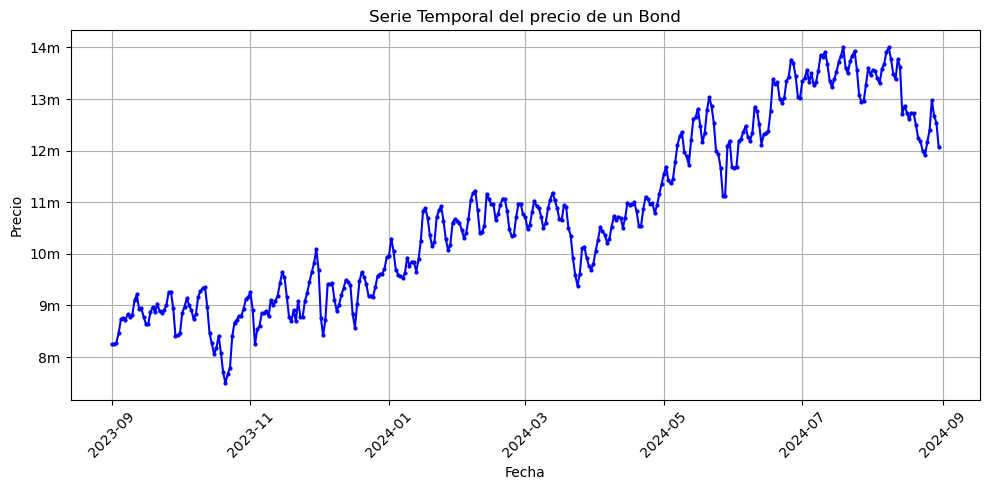

In [6]:
# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['price'], marker='o', linestyle='-', color='b', markersize=2)

# Configurar etiquetas y título
plt.title('Serie Temporal del precio de un Bond')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
# Formatear los valores del eje Y en millones
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x/1e6:.0f}m"))
# Mostrar la gráfica
plt.tight_layout()  # Ajustar el layout para que no se solapen los elementos
plt.savefig('Serie Temporal.jpg', format='jpg')
plt.show()

Filtro de Hodrick Prescott

In [7]:
def crear_matriz_A(n):
    # Crear una matriz de ceros de tamaño n x n
    matriz = np.zeros((n-2, n))
    
    # Llenar la diagonal principal con 1
    np.fill_diagonal(matriz, 1)
    
    # Llenar la diagonal superior con -2
    np.fill_diagonal(matriz[:, 1:n-1], -2)
    
    # Llenar la diagonal superior a la anterior con 1
    np.fill_diagonal(matriz[:, 2:], 1)
    
    return matriz


In [8]:
Y = df["price"].to_numpy()
n = Y.shape[0]
A = crear_matriz_A(n)
ATA = np.dot(A.T,A)
nn = np.dot(A.T,A).shape[0]
In =  np.eye(nn)

In [9]:
lamda = 129600
S = np.dot(np.linalg.inv(In+lamda*ATA),Y)
C = Y-S

In [10]:
df["S"] = S
df["C"] = C

Con esto veamos como queda el filtro

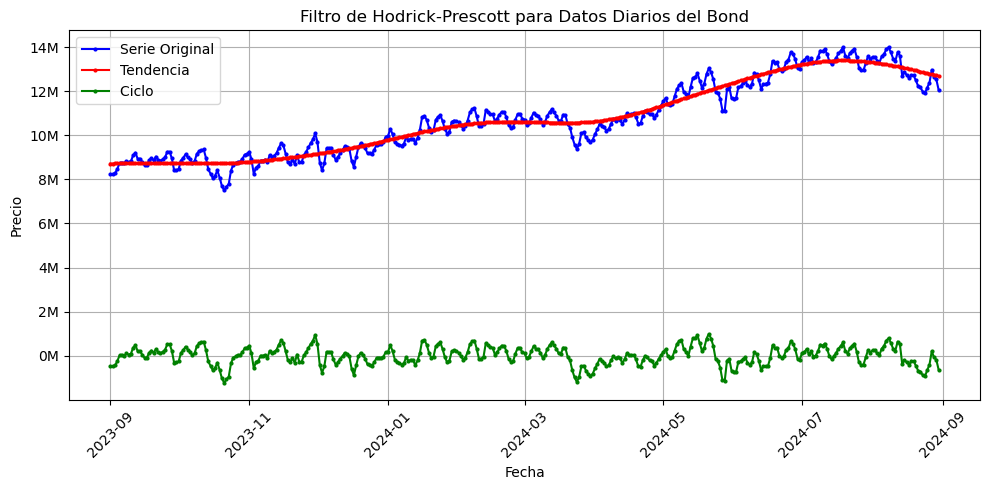

In [11]:
# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['price'], label='Serie Original', marker='o', linestyle='-', color='b', markersize=2)
plt.plot(df['date'], df['S'], label='Tendencia ', marker='o', linestyle='-', color='r', markersize=2)
plt.plot(df['date'], df['C'], label='Ciclo ', marker='o', linestyle='-', color='g', markersize=2)

# Configurar etiquetas y título
plt.title('Filtro de Hodrick-Prescott para Datos Diarios del Bond')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
# Formatear los valores del eje Y en millones
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x/1e6:.0f}M"))
# Mostrar la gráfica
plt.tight_layout()  # Ajustar el layout para que no se solapen los elementos
plt.savefig('Filtro Serie Temporal.jpg', format='jpg')
plt.show()

Comparemos con lo que da statsmodels

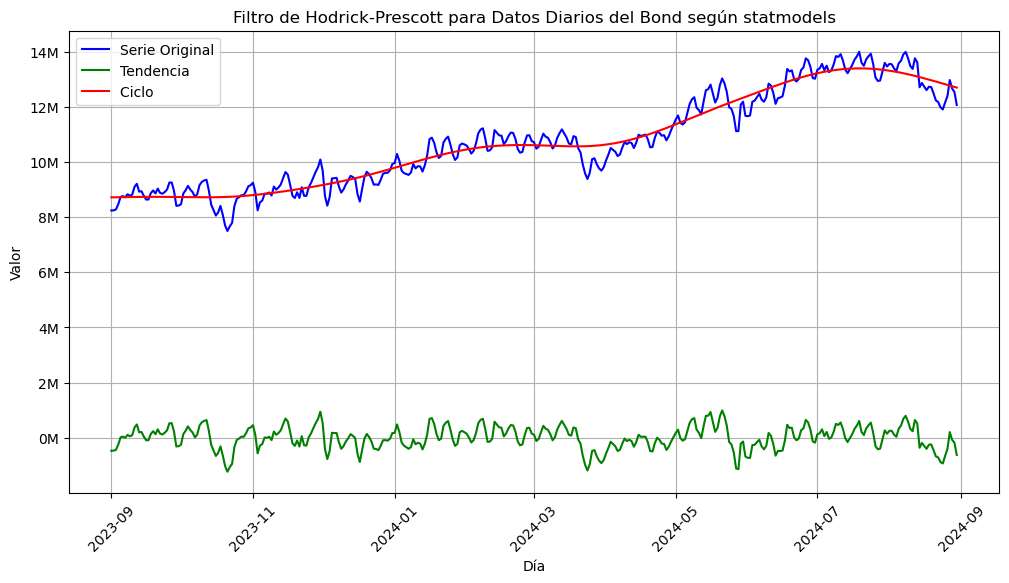

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter


df['trend'], df['cycle'] = hpfilter(df['price'], lamb=lamda)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['date'],df['price'], label='Serie Original', color='blue')
plt.plot(df['date'],df['trend'], label='Tendencia ', color='green')
plt.plot(df['date'],df['cycle'], label='Ciclo ', color='red')
plt.title('Filtro de Hodrick-Prescott para Datos Diarios del Bond según statmodels')
plt.xlabel('Día')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
# Formatear los valores del eje Y en millones
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x/1e6:.0f}M"))
plt.legend()
plt.grid()
plt.show()

Victoria!

# Parte II, Pregunta 3

In [58]:
 df1 = pd.read_excel('./Poblacion de Chile.xls', index_col=None, header=None)

In [59]:
df1.head()

,0,1,2,3,4,5,6
0,Historia de la población de Chile,NaN,NaN,NaN,Proyección de población (2020-2100),NaN,NaN
1,Año,Población,Tasa de crecimiento,NaN,Año,Población,Tasa de crecimiento
2,1951,6664588,N/A %,NaN,2020,18 472 642,N/A %
3,1952,6800030,0.0203,NaN,2025,19 099 229,0.0339
4,1953,6943693,0.0211,NaN,2030,19 637 328,0.0282


In [60]:
data = df1[[0,1,2]].drop(0)
pred = df1[[4,5,6]].drop(0)
colname = data.iloc[0].tolist()

# Renombrar las columnas
data.columns = colname
colname2 = pred.iloc[0].tolist()

# Renombrar las columnas
pred.columns = colname2

data = data.iloc[1:].dropna()
pred = pred.iloc[1:].dropna()


In [62]:
data

,Año,Población,Tasa de crecimiento
2,1951,6664588,N/A %
3,1952,6800030,0.0203
4,1953,6943693,0.0211
5,1954,7092809,0.0215
6,1955,7245918,0.0216
...,...,...,...
71,2020,19034571,0.0102
72,2021,19237670,0.0107
73,2022,19442936,0.0107
74,2023,19650392,0.0107


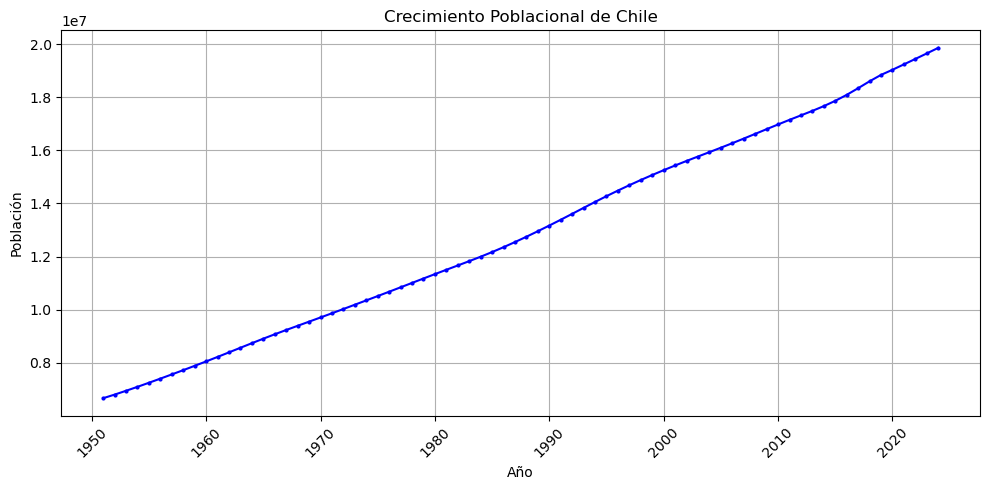

In [86]:
# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(data['Año'], data['Población'], marker='o', linestyle='-', color='b', markersize=2)

# Configurar etiquetas y título
plt.title('Crecimiento Poblacional de Chile')
plt.xlabel('Año')
plt.ylabel('Población')
plt.grid()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
# Formatear los valores del eje Y en millones
# Mostrar la gráfica
plt.tight_layout()  # Ajustar el layout para que no se solapen los elementos
plt.savefig('Serie Temporal cuevas.jpg', format='jpg')
plt.show()

In [68]:
data["Año"].astype(int).dtype

dtype('int32')

In [69]:
coef = np.polyfit(data["Año"].astype(int).values,data["Población"].astype(int).values,2)

In [70]:
coef

array([ 3.54977409e+02, -1.22988316e+06,  1.05493444e+09])

In [73]:
y= lambda t: coef[2]+t*coef[1]+(t**2)*coef[0]

In [74]:
y(2024)

19842847.60187745

In [80]:
prediccion = pred["Año"].astype(int).tolist()
resultado = []
for p in prediccion:
    resultado.append(y(p))
pred["pred_test"] = resultado

In [81]:
pred

,Año,Población,Tasa de crecimiento,pred_test
2,2020,18 472 642,N/A %,1.902027e+07
3,2025,19 099 229,0.0339,2.005027e+07
4,2030,19 637 328,0.0282,2.109802e+07
5,2035,20 058 961,0.0215,2.216352e+07
6,2040,20 378 605,0.0159,2.324677e+07
7,2045,20 598 056,0.0108,2.434777e+07
8,2050,20 718 131,0.0058,2.546651e+07
9,2055,20 746 929,0.0014,2.660301e+07
10,2060,20 697 072,-0.0024,2.775725e+07
11,2065,20 583 490,-0.0055,2.892925e+07


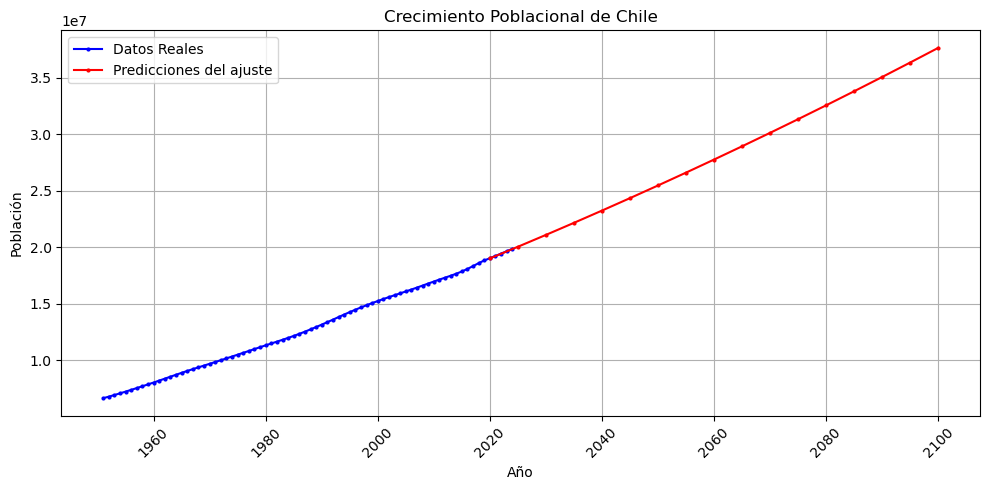

In [93]:
# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(data['Año'], data['Población'], marker='o', linestyle='-', color='b', label = "Datos Reales",markersize=2)
plt.plot(pred['Año'], pred['pred_test'], marker='o', linestyle='-', color='r',label = "Predicciones del ajuste" ,markersize=2)
#plt.plot(pred['Año'], pred['Población'], marker='o', linestyle='-', color='g',label = "Target" ,markersize=2)
# Configurar etiquetas y título
plt.title('Crecimiento Poblacional de Chile')
plt.xlabel('Año')
plt.ylabel('Población')
plt.grid()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
# Formatear los valores del eje Y en millones
# Mostrar la gráfica
plt.tight_layout()  # Ajustar el layout para que no se solapen los elementos
plt.legend()
plt.savefig('Serie Temporal cuevas.jpg', format='jpg')
plt.show()

In [94]:
coef

array([ 3.54977409e+02, -1.22988316e+06,  1.05493444e+09])

In [98]:
pred["pred_test"] = pred["pred_test"].astype(int)

In [100]:
pred[["Población","pred_test"]]

,Población,pred_test
2,18 472 642,19020265
3,19 099 229,20050267
4,19 637 328,21098019
5,20 058 961,22163519
6,20 378 605,23246768
7,20 598 056,24347765
8,20 718 131,25466512
9,20 746 929,26603007
10,20 697 072,27757252
11,20 583 490,28929245
